In [1]:
import pandas as pd
import numpy as np
import requests
import time
import json
import prettytable
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
# Read in csv file from cleaned up api pull from bls
file_path = 'jobs_age_df.csv'
df = pd.read_csv(file_path)
df

,year,period,periodName,0,1,2,3,4,5
0,2009,M01,January,18287,30438,32274,33942,20918,6130
1,2009,M02,February,18300,30295,32052,33867,21003,5966
2,2009,M03,March,18067,30170,31726,33773,20945,6055
3,2009,M04,April,18092,30082,31734,33801,21052,6034
4,2009,M05,May,17817,29924,31639,33683,21182,6132
...,...,...,...,...,...,...,...,...,...
115,2018,M08,August,18721,35352,32655,32322,26578,9687
116,2018,M09,September,19130,35511,32501,32320,26709,9933
117,2018,M10,October,19156,35693,32857,32343,26828,9925
118,2018,M11,November,19164,35672,32796,32376,26855,10046


In [3]:
#rename columns
job_age_df = df.rename(columns={'0':'16-24 Age Group',
                              '1': '25-34 Age Group',
                              '2': '35-44 Age Group',
                              '3': '45-54 Age Group',
                              '4': '55-64 Age Group',
                              '5': '65 and Over Group'})
job_age_df.head()

,year,period,periodName,16-24 Age Group,25-34 Age Group,35-44 Age Group,45-54 Age Group,55-64 Age Group,65 and Over Group
0,2009,M01,January,18287,30438,32274,33942,20918,6130
1,2009,M02,February,18300,30295,32052,33867,21003,5966
2,2009,M03,March,18067,30170,31726,33773,20945,6055
3,2009,M04,April,18092,30082,31734,33801,21052,6034
4,2009,M05,May,17817,29924,31639,33683,21182,6132


In [4]:
# add total employed column from all age groups
z = [ row['16-24 Age Group'] + row['25-34 Age Group'] + row['35-44 Age Group'] + row['45-54 Age Group'] + row['55-64 Age Group'] + row['65 and Over Group'] for index, row in job_age_df.iterrows() ]
job_age_df['Total Employment'] = z
job_age_df

,year,period,periodName,16-24 Age Group,25-34 Age Group,35-44 Age Group,45-54 Age Group,55-64 Age Group,65 and Over Group,Total Employment
0,2009,M01,January,18287,30438,32274,33942,20918,6130,141989
1,2009,M02,February,18300,30295,32052,33867,21003,5966,141483
2,2009,M03,March,18067,30170,31726,33773,20945,6055,140736
3,2009,M04,April,18092,30082,31734,33801,21052,6034,140795
4,2009,M05,May,17817,29924,31639,33683,21182,6132,140377
...,...,...,...,...,...,...,...,...,...,...
115,2018,M08,August,18721,35352,32655,32322,26578,9687,155315
116,2018,M09,September,19130,35511,32501,32320,26709,9933,156104
117,2018,M10,October,19156,35693,32857,32343,26828,9925,156802
118,2018,M11,November,19164,35672,32796,32376,26855,10046,156909


## Hypothesis Questions
* Gross trends in employment by age group: younger groups will experience slower (or even negative) job growth as opposed to older groups who performed better
* Older groups will grow as a percentage of those employed
* Trends in employment should continue (based on regression analysis)


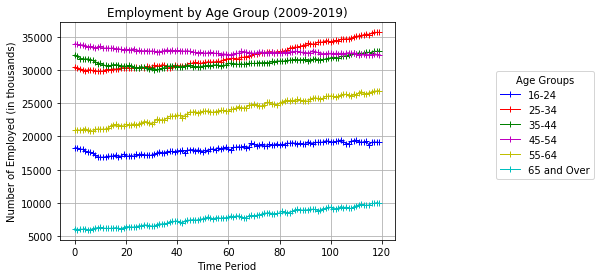

In [12]:
# line plot showing employment trends for all age groups
group_16_24 = plt.plot(job_age_df.index, job_age_df['16-24 Age Group'], marker="+",color="blue", linewidth=1, label="16-24")
group_25_34 = plt.plot(job_age_df.index, job_age_df['25-34 Age Group'], marker="+",color="red", linewidth=1, label="25-34")
group_35_44 = plt.plot(job_age_df.index, job_age_df['35-44 Age Group'], marker="+",color="g", linewidth=1, label="35-44")
group_45_54 = plt.plot(job_age_df.index, job_age_df['45-54 Age Group'], marker="+",color="m", linewidth=1, label="45-54")
group_55_64 = plt.plot(job_age_df.index, job_age_df['55-64 Age Group'], marker="+",color="y", linewidth=1, label="55-64")
group_65_over = plt.plot(job_age_df.index, job_age_df['65 and Over Group'], marker="+",color="c", linewidth=1, label="65 and Over")
#group_total = plt.plot(job_age_df['index'], job_age_df['Total Employment'], marker="+",color="k", linewidth=1, label="Total")
plt.title('Employment by Age Group (2009-2019)')
plt.xlabel('Time Period')
plt.ylabel('Number of Employed (in thousands)')
plt.grid()

legend = plt.legend(title='Age Groups', loc='upper center',  bbox_to_anchor=(1.45, 0.8))
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]
legend.legendHandles[3]._sizes = [30]
legend.legendHandles[4]._sizes = [30]
legend.legendHandles[5]._sizes = [30]

plt.savefig('employment_by_age_group.png', bbox_inches='tight')

plt.show()

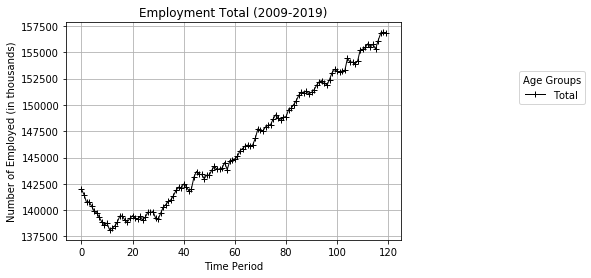

In [14]:
#line plot for total employment
group_total = plt.plot(job_age_df.index, job_age_df['Total Employment'], marker="+",color="k", linewidth=1, label="Total")
plt.title('Employment Total (2009-2019)')
plt.xlabel('Time Period')
plt.ylabel('Number of Employed (in thousands)')
plt.grid()
legend = plt.legend(title='Age Groups', loc='upper center',  bbox_to_anchor=(1.45, 0.8))
legend.legendHandles[0]._sizes = [30]

plt.savefig('employment_total.png', bbox_inches='tight')

plt.show()


In [12]:
# create df with data to create pie charts shwoing age group percentage to total employent for years examined
group_age_group = job_age_df[['periodName', '16-24 Age Group', '25-34 Age Group', '35-44 Age Group', '45-54 Age Group', '55-64 Age Group', '65 and Over Group']]
group_age_group

,periodName,16-24 Age Group,25-34 Age Group,35-44 Age Group,45-54 Age Group,55-64 Age Group,65 and Over Group
0,January,18287,30438,32274,33942,20918,6130
1,February,18300,30295,32052,33867,21003,5966
2,March,18067,30170,31726,33773,20945,6055
3,April,18092,30082,31734,33801,21052,6034
4,May,17817,29924,31639,33683,21182,6132
...,...,...,...,...,...,...,...
115,August,18721,35352,32655,32322,26578,9687
116,September,19130,35511,32501,32320,26709,9933
117,October,19156,35693,32857,32343,26828,9925
118,November,19164,35672,32796,32376,26855,10046


In [13]:
dec_jobs = group_age_group.loc[group_age_group['periodName'] == 'December']
dec_jobs

,periodName,16-24 Age Group,25-34 Age Group,35-44 Age Group,45-54 Age Group,55-64 Age Group,65 and Over Group
11,December,16893,29836,30791,33290,21114,6193
23,December,17033,30351,30513,33227,21901,6376
35,December,17546,30765,30356,32940,22485,6893
47,December,17887,31139,30548,32675,23739,7412
59,December,18394,31622,30766,32371,23862,7748
71,December,18636,32433,31014,32597,24718,8140
83,December,19013,32979,31448,32585,25462,8552
95,December,19130,34225,31574,32645,25731,8820
107,December,18922,34631,32304,32616,26192,9251
119,December,19111,35689,32881,32263,26910,9951


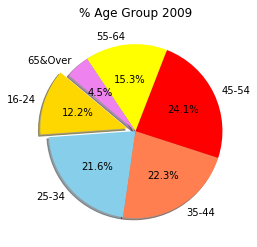

In [25]:
# pie chart for percentage of total employment by age group by year
age_groups = ['16-24', '25-34', '35-44', '45-54', '55-64', '65&Over']
employed = [16893, 29836, 30791, 33290, 21114, 6193]
colors = ['gold', 'skyblue', 'coral', 'red', 'yellow', 'violet']
explode = [0.1, 0, 0, 0, 0, 0]
plt.pie(employed, explode=explode, labels=age_groups, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% Age Group 2009')

plt.savefig('pct_agegroup_2009.png')

plt.show()


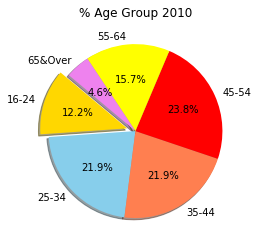

In [26]:
age_groups = ['16-24', '25-34', '35-44', '45-54', '55-64', '65&Over']
employed = [17033, 30551, 30513, 33227, 21901, 6376]
colors = ['gold', 'skyblue', 'coral', 'red', 'yellow', 'violet']
explode = [0.1, 0, 0, 0, 0, 0]
plt.pie(employed, explode=explode, labels=age_groups, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% Age Group 2010')

plt.savefig('pct_agegroup_2010.png')

plt.show()

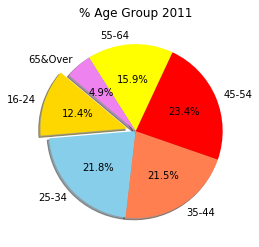

In [24]:
age_groups = ['16-24', '25-34', '35-44', '45-54', '55-64', '65&Over']
employed = [17546, 30765, 30356, 32940, 22485, 6893]
colors = ['gold', 'skyblue', 'coral', 'red', 'yellow', 'violet']
explode = [0.1, 0, 0, 0, 0, 0]
plt.pie(employed, explode=explode, labels=age_groups, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% Age Group 2011')

plt.savefig('pct_agegroup_2011.png')

plt.show()

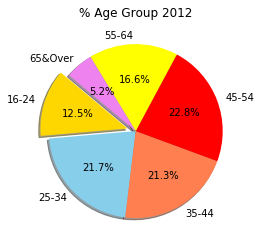

In [27]:
age_groups = ['16-24', '25-34', '35-44', '45-54', '55-64', '65&Over']
employed = [17887, 31139, 30548, 32675, 23739, 7412]
colors = ['gold', 'skyblue', 'coral', 'red', 'yellow', 'violet']
explode = [0.1, 0, 0, 0, 0, 0]
plt.pie(employed, explode=explode, labels=age_groups, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% Age Group 2012')

plt.savefig('pct_agegroup_2012.png')

plt.show()

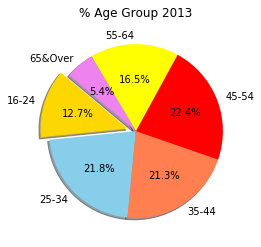

In [28]:
age_groups = ['16-24', '25-34', '35-44', '45-54', '55-64', '65&Over']
employed = [18394, 31622, 30766, 32371, 23862, 7748]
colors = ['gold', 'skyblue', 'coral', 'red', 'yellow', 'violet']
explode = [0.1, 0, 0, 0, 0, 0]
plt.pie(employed, explode=explode, labels=age_groups, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% Age Group 2013')

plt.savefig('pct_agegroup_2013.png')

plt.show()

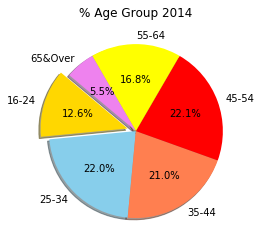

In [29]:
age_groups = ['16-24', '25-34', '35-44', '45-54', '55-64', '65&Over']
employed = [18636, 32433, 31014, 32597, 24718, 8140]
colors = ['gold', 'skyblue', 'coral', 'red', 'yellow', 'violet']
explode = [0.1, 0, 0, 0, 0, 0]
plt.pie(employed, explode=explode, labels=age_groups, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% Age Group 2014')

plt.savefig('pct_agegroup_2014.png')

plt.show()

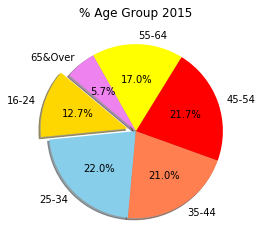

In [30]:
age_groups = ['16-24', '25-34', '35-44', '45-54', '55-64', '65&Over']
employed = [19013, 32979, 31448, 32585, 25462, 8552]
colors = ['gold', 'skyblue', 'coral', 'red', 'yellow', 'violet']
explode = [0.1, 0, 0, 0, 0, 0]
plt.pie(employed, explode=explode, labels=age_groups, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% Age Group 2015')

plt.savefig('pct_agegroup_2015.png')

plt.show()

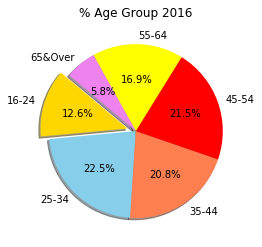

In [31]:
age_groups = ['16-24', '25-34', '35-44', '45-54', '55-64', '65&Over']
employed = [19130, 34225, 31574, 32645, 25731, 8820]
colors = ['gold', 'skyblue', 'coral', 'red', 'yellow', 'violet']
explode = [0.1, 0, 0, 0, 0, 0]
plt.pie(employed, explode=explode, labels=age_groups, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% Age Group 2016')

plt.savefig('pct_agegroup_2016.png')

plt.show()

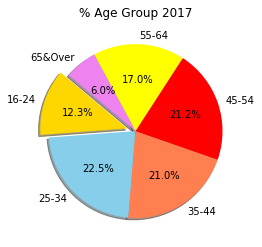

In [32]:
age_groups = ['16-24', '25-34', '35-44', '45-54', '55-64', '65&Over']
employed = [18922, 34631, 32304, 32616, 26192, 9251]
colors = ['gold', 'skyblue', 'coral', 'red', 'yellow', 'violet']
explode = [0.1, 0, 0, 0, 0, 0]
plt.pie(employed, explode=explode, labels=age_groups, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% Age Group 2017')

plt.savefig('pct_agegroup_2017.png')

plt.show()

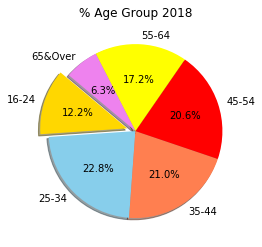

In [33]:
age_groups = ['16-24', '25-34', '35-44', '45-54', '55-64', '65&Over']
employed = [19111, 35689, 32881, 32263, 26910, 9951]
colors = ['gold', 'skyblue', 'coral', 'red', 'yellow', 'violet']
explode = [0.1, 0, 0, 0, 0, 0]
plt.pie(employed, explode=explode, labels=age_groups, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% Age Group 2018')

plt.savefig('pct_agegroup_2018.png')

plt.show()

In [5]:
#dec_index = dec_jobs.iloc[:, 0]
#dec_index

In [6]:
#age group change strings to integers
job_age_df = job_age_df.reset_index()
job_age_df

,index,year,period,periodName,16-24 Age Group,25-34 Age Group,35-44 Age Group,45-54 Age Group,55-64 Age Group,65 and Over Group,Total Employment
0,0,2009,M01,January,18287,30438,32274,33942,20918,6130,141989
1,1,2009,M02,February,18300,30295,32052,33867,21003,5966,141483
2,2,2009,M03,March,18067,30170,31726,33773,20945,6055,140736
3,3,2009,M04,April,18092,30082,31734,33801,21052,6034,140795
4,4,2009,M05,May,17817,29924,31639,33683,21182,6132,140377
...,...,...,...,...,...,...,...,...,...,...,...
115,115,2018,M08,August,18721,35352,32655,32322,26578,9687,155315
116,116,2018,M09,September,19130,35511,32501,32320,26709,9933,156104
117,117,2018,M10,October,19156,35693,32857,32343,26828,9925,156802
118,118,2018,M11,November,19164,35672,32796,32376,26855,10046,156909


In [7]:
time_index = job_age_df.iloc[:, 0]
time_index

0        0
1        1
2        2
3        3
4        4
      ... 
115    115
116    116
117    117
118    118
119    119
Name: index, Length: 120, dtype: int64

In [24]:
# regression for 16-24 group
trend_16_24 = job_age_df.iloc[:, 4]
g1_slope, g1_int, g1_r, g1_p, g1_std_err = stats.linregress(
    time_index, trend_16_24)
g1_fit = g1_slope * time_index + g1_int

In [25]:
# regression for 25-34 group
trend_25_34 = job_age_df.iloc[:, 5]
g2_slope, g2_int, g2_r, g2_p, g2_std_err = stats.linregress(
    time_index, trend_25_34)
g2_fit = g2_slope * time_index + g2_int

In [26]:
# regression for 35-44 group
trend_35_44 = job_age_df.iloc[:, 6]
g3_slope, g3_int, g3_r, g3_p, g3_std_err = stats.linregress(
    time_index, trend_35_44)
g3_fit = g3_slope * time_index + g3_int

In [27]:
# regression for 45-54 group
trend_45_54 = job_age_df.iloc[:, 7]
g4_slope, g4_int, g4_r, g4_p, g4_std_err = stats.linregress(
    time_index, trend_45_54)
g4_fit = g4_slope * time_index + g4_int

In [28]:
# regression for 55-64 group
trend_55_64 = job_age_df.iloc[:, 8]
g5_slope, g5_int, g5_r, g5_p, g5_std_err = stats.linregress(
    time_index, trend_55_64)
g5_fit = g5_slope * time_index + g5_int

In [29]:
# regression for 65 and over group
trend_65_over = job_age_df.iloc[:, 9]
g6_slope, g6_int, g6_r, g6_p, g6_std_err = stats.linregress(
    time_index, trend_65_over)
g6_fit = g6_slope * time_index + g6_int

In [30]:
# regression for total employed
trend_total = job_age_df.iloc[:, 10]
g7_slope, g7_int, g7_r, g7_p, g7_std_err = stats.linregress(
    time_index, trend_total)
g7_fit = g7_slope * time_index + g7_int

Text(0.5, 0, 'Time Period: 2009-2018')

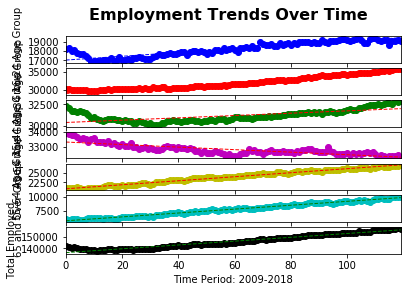

In [31]:
# Plot Regression
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, sharex=True)
fig.suptitle("Employment Trends Over Time", fontsize=16, fontweight="bold")

ax1.set_xlim(min(time_index), max(time_index))
ax1.plot(time_index, trend_16_24, linewidth=1, marker="o", color="b")
ax1.plot(time_index, g1_fit, "b--", linewidth=1)
ax1.set_ylabel("16-24 Age Group")

ax2.plot(time_index, trend_25_34, linewidth=1, marker="o", color="r")
ax2.plot(time_index, g2_fit, "r--", linewidth=1)
ax2.set_ylabel("25-34 Age Group")

ax3.plot(time_index, trend_35_44, linewidth=1, marker="o", color="g")
ax3.plot(time_index, g3_fit, "r--", linewidth=1)
ax3.set_ylabel("35-44 Age Group")

ax4.plot(time_index, trend_45_54, linewidth=1, marker="o", color="m")
ax4.plot(time_index, g4_fit, "r--", linewidth=1)
ax4.set_ylabel("45-54 Age Group")

ax5.plot(time_index, trend_55_64, linewidth=1, marker="o", color="y")
ax5.plot(time_index, g5_fit, "r--", linewidth=1)
ax5.set_ylabel("55-64 Age Group")

ax6.plot(time_index, trend_65_over, linewidth=1, marker="o", color="c")
ax6.plot(time_index, g6_fit, "g--", linewidth=1)
ax6.set_ylabel("65 and Over Group")

ax7.plot(time_index, trend_total, linewidth=1, marker="o", color="k")
ax7.plot(time_index, g7_fit, "g--", linewidth=1)
ax7.set_ylabel("Total Employed")
ax7.set_xlabel("Time Period: 2009-2018")